<a href="https://colab.research.google.com/github/yvishyst/DS-Unit-2-Regression-Classification/blob/master/Copy_of_assignment_regression_classification_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Regression & Classification, Module 4

## Assignment

- [ ] Watch Aaron Gallant's [video #1](https://www.youtube.com/watch?v=pREaWFli-5I) (12 minutes) & [video #2](https://www.youtube.com/watch?v=bDQgVt4hFgY) (9 minutes) to learn about the mathematics of Logistic Regression.
- [X] Do train/validate/test split with the Tanzania Waterpumps data.
- [X] Do one-hot encoding. For example, in addition to `quantity`, you could try `basin`, `extraction_type_class`, and more. (But remember it may not work with high cardinality categoricals.)
- [X] Use scikit-learn for logistic regression.
- [X] Get your validation accuracy score.
- [X] Get and plot your coefficients.
- [X] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [X] Commit your notebook to your fork of the GitHub repo.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.


## Stretch Goals

### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Clean the data. For ideas, refer to [The Quartz guide to bad data](https://github.com/Quartz/bad-data-guide),  a "reference to problems seen in real-world data along with suggestions on how to resolve them." One of the issues is ["Zeros replace missing values."](https://github.com/Quartz/bad-data-guide#zeros-replace-missing-values)
- [ ] Make exploratory visualizations.
- [ ] Do [feature scaling](https://scikit-learn.org/stable/modules/preprocessing.html).
- [ ] Try [scikit-learn pipelines](https://scikit-learn.org/stable/modules/compose.html).


#### Exploratory visualizations

Visualize the relationships between feature(s) and target. I recommend you do this with your training set, after splitting your data. 

To visualize this dataset, you may want to create a new column to represent the target as a number, 0 or 1. For example:

```python
train['functional'] = (train['status_group']=='functional').astype(int)
```



You can try [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html) for features with reasonably few unique values. (With too many unique values, the plot is unreadable.)

- Categorical features. (If there are too many unique values, you can replace less frequent values with "OTHER.")
- Numeric features. (If there are too many unique values, you can [bin with pandas cut / qcut functions](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html?highlight=qcut#discretization-and-quantiling).)

You can try [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html) with numeric features. For this problem, you may want to use the parameter `logistic=True`

You do _not_ need to use Seaborn, but it's nice because it includes confidence intervals to visualize uncertainty.

#### High-cardinality categoricals

This code from the previous assignment demonstrates how to replace less frequent values with 'OTHER'

```python
# Reduce cardinality for NEIGHBORHOOD feature ...

# Get a list of the top 10 neighborhoods
top10 = train['NEIGHBORHOOD'].value_counts()[:10].index

# At locations where the neighborhood is NOT in the top 10,
# replace the neighborhood with 'OTHER'
train.loc[~train['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
test.loc[~test['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
```

#### Pipelines

[Scikit-Learn User Guide](https://scikit-learn.org/stable/modules/compose.html) explains why pipelines are useful, and demonstrates how to use them:

> Pipeline can be used to chain multiple estimators into one. This is useful as there is often a fixed sequence of steps in processing the data, for example feature selection, normalization and classification. Pipeline serves multiple purposes here:
> - **Convenience and encapsulation.** You only have to call fit and predict once on your data to fit a whole sequence of estimators.
> - **Joint parameter selection.** You can grid search over parameters of all estimators in the pipeline at once.
> - **Safety.** Pipelines help avoid leaking statistics from your test data into the trained model in cross-validation, by ensuring that the same samples are used to train the transformers and predictors.

### Reading
- [ ] [Why is logistic regression considered a linear model?](https://www.quora.com/Why-is-logistic-regression-considered-a-linear-model)
- [ ] [Training, Validation, and Testing Data Sets](https://end-to-end-machine-learning.teachable.com/blog/146320/training-validation-testing-data-sets)
- [ ] [How (and why) to create a good validation set](https://www.fast.ai/2017/11/13/validation-sets/)
- [ ] [Always start with a stupid model, no exceptions](https://blog.insightdatascience.com/always-start-with-a-stupid-model-no-exceptions-3a22314b9aaa)
- [ ] [Statistical Modeling: The Two Cultures](https://projecteuclid.org/download/pdf_1/euclid.ss/1009213726)
- [ ] [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapters 1-3, for more math & theory, but in an accessible, readable way (without an excessive amount of formulas or academic pre-requisites).



In [0]:
import os, sys
in_colab = 'google.colab' in sys.modules

# If you're in Colab...
if in_colab:
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification.git
    !git pull origin master
    
    # Install required python packages
    !pip install -r requirements.txt
    
    # Change into directory for module
    os.chdir('module4')

In [0]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
import pandas as pd

train_features = pd.read_csv('../data/tanzania/train_features.csv')
train_labels = pd.read_csv('../data/tanzania/train_labels.csv')
test_features = pd.read_csv('../data/tanzania/test_features.csv')
sample_submission = pd.read_csv('../data/tanzania/sample_submission.csv')

assert train_features.shape == (59400, 40)
assert train_labels.shape == (59400, 2)
assert test_features.shape == (14358, 40)
assert sample_submission.shape == (14358, 2)

In [0]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.feature_selection import SelectKBest
import category_encoders as ce
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(train_features,train_labels,test_size=0.20,stratify=train_labels['status_group'])

In [168]:
#Changing the date recorded column to date format
X_train.loc[:,'date_recorded']=pd.to_datetime(X_train['date_recorded'],infer_datetime_format=True)
X_test.loc[:,'date_recorded']=pd.to_datetime(X_test['date_recorded'],infer_datetime_format=True)
#Getting the first day of date recorded
first_recording = X_train['date_recorded'].min()
#creating a new column measuring the record date since the first recording
X_train['days_since']= (X_train['date_recorded'] - first_recording).astype(int)/86400000000000
X_test['days_since']= (X_test['date_recorded'] - first_recording).astype(int)/86400000000000
#Selecting relevant number columns where missing values are placed as zero
num_columns = X_train.select_dtypes(include='number').columns.drop(['id','longitude','district_code','num_private','gps_height'])
#Replacing the values of zero with Nan Values
X_train[num_columns]=X_train[num_columns].replace(0,np.NaN)
X_test[num_columns]=X_test[num_columns].replace(0,np.NaN)
#Getting the mean values of the relevant columns
mean_values = X_train[num_columns].mean()
#Getting the first contruction year 
min_year = X_train['construction_year'].min()
#Replacing construction year nans with first construction year
X_train['construction_year'] = X_train['construction_year'].replace(np.NaN,min_year)
X_test['construction_year'] = X_test['construction_year'].replace(np.NaN,min_year)
#Replacing the Nan values in numerical columns with the mean values of the existing data
X_train[num_columns] = X_train[num_columns].replace(np.NaN,mean_values)
X_test[num_columns] = X_test[num_columns].replace(np.NaN,mean_values)
#Converting boolean values to Int
X_train['public_meeting'] = X_train['public_meeting'].fillna(True).astype(int)
X_test['public_meeting'] = X_test['public_meeting'].fillna(True).astype(int)
X_train['permit'] = X_train['permit'].fillna(True).astype(int)
X_test['permit'] = X_test['permit'].fillna(True).astype(int)
#Chanding district code column to string for categorical data
X_train['district_code'] = X_train['district_code'].astype('str')
X_test['district_code'] = X_test['district_code'].astype('str')

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexin

In [0]:
#Not considering feature are id - useless, date_recorded replaced with days_since
#Not relevant or too many null vaues funder, installer,scheme_name,num_private,scheme_name
#High cardinality wpt_name,subvillage,lga,ward
#remove region code as region is considered
#remove scheme_management as management is considered
#constant value recorded_by
#keeping extraction_type and removing extraction_type_group and extraction_type_class
#payment_type and payment are same
#removing waterpoint_type_group as it can be replaced with waterpoint_type
#keeping water_quality as same as quality_group
#quantity_group and quantity are same
#source and source_type are same
features = ['amount_tsh','gps_height','longitude','latitude','basin',
'region','district_code', 'population', 'public_meeting', 'permit',
 'construction_year', 'extraction_type', 'management', 'management_group',
 'payment', 'water_quality', 'quantity', 'source', 'source_class', 'waterpoint_type',
'days_since']
target = 'status_group'

In [170]:
#Code for Feature Selection, scaling and model prediction
#Encoding Cardinal Columns
encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train[features])
X_test_encoded = encoder.transform(X_test[features])

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)
# X_train_scaled = (X_train_encoded)
# X_test_scaled = (X_test_encoded)
model = LogisticRegression(multi_class='multinomial',max_iter=1500,solver='lbfgs',verbose=True)
model.fit(X_train_scaled,Y_train[target])
y_pred = model.predict(X_test_scaled)
accuracy_score(Y_test[target],y_pred)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.6s finished


0.7463804713804714

In [171]:
#preparing target for lgbm model
train_target = (Y_train[target].replace({'functional':0,'non functional':1,'functional needs repair':2})).reset_index(drop=True)
test_target = (Y_test[target].replace({'functional':0,'non functional':1,'functional needs repair':2})).reset_index(drop=True)

skf = StratifiedKFold(5,shuffle=True,random_state=3)
for trainindex,testindex in skf.split(X_train_scaled,train_target):
    lgbm = LGBMClassifier(objective='multiclass',n_estimators=2500,learning_rate = 0.03,is_provide_training_metric=True)
    X_train,y_train = X_train_scaled[trainindex],train_target.iloc[trainindex]
    X_test,y_test = X_train_scaled[testindex],train_target.iloc[testindex]
    #print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)
    lgbm.fit(X_train,y_train,eval_metric='softmax',verbose=500,eval_set=(X_test,y_test))
    predict = lgbm.predict(X_test)
    #print(predict[:5])
    print(accuracy_score(y_test,predict))

#Getting accuracy score for X_test
y_pred = lgbm.predict(X_test_scaled)
accuracy_score(test_target,y_pred)

[500]	valid_0's multi_logloss: 0.5224	valid_0's multi_logloss: 0.5224
[1000]	valid_0's multi_logloss: 0.500946	valid_0's multi_logloss: 0.500946
[1500]	valid_0's multi_logloss: 0.492655	valid_0's multi_logloss: 0.492655
[2000]	valid_0's multi_logloss: 0.489156	valid_0's multi_logloss: 0.489156
[2500]	valid_0's multi_logloss: 0.488285	valid_0's multi_logloss: 0.488285
0.8078905839032089
[500]	valid_0's multi_logloss: 0.51694	valid_0's multi_logloss: 0.51694
[1000]	valid_0's multi_logloss: 0.498284	valid_0's multi_logloss: 0.498284
[1500]	valid_0's multi_logloss: 0.491209	valid_0's multi_logloss: 0.491209
[2000]	valid_0's multi_logloss: 0.487901	valid_0's multi_logloss: 0.487901
[2500]	valid_0's multi_logloss: 0.486959	valid_0's multi_logloss: 0.486959
0.8076801683324566
[500]	valid_0's multi_logloss: 0.51792	valid_0's multi_logloss: 0.51792
[1000]	valid_0's multi_logloss: 0.498484	valid_0's multi_logloss: 0.498484
[1500]	valid_0's multi_logloss: 0.492959	valid_0's multi_logloss: 0.49295

0.8053872053872054

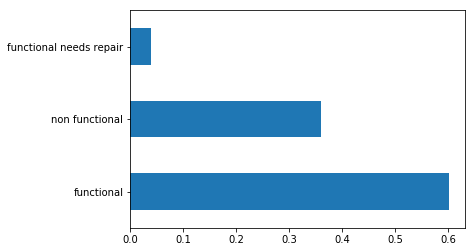

In [172]:
#making the same changes to test features as done to train features
#Changing the date recorded column to date format
test_features['date_recorded']=pd.to_datetime(test_features['date_recorded'],infer_datetime_format=True)
#creating a new column measuring the record date since the first recording
test_features['days_since']= (test_features['date_recorded'] - first_recording).astype(int)/86400000000000
#Selecting relevant number columns where missing values are placed as zero
#Replacing the values of zero with Nan Values
test_features[num_columns]=test_features[num_columns].replace(0,np.NaN)
test_features['construction_year'] = test_features['construction_year'].replace(np.NaN,min_year)
#Replacing the Nan values in numerical columns with the mean values of the existing data
test_features[num_columns] = test_features[num_columns].replace(np.NaN,mean_values)
test_features['public_meeting'] = test_features['public_meeting'].fillna(True).astype(int)
test_features['permit'] = test_features['permit'].fillna(True).astype(int)
test_features['district_code'] = test_features['district_code'].astype('str')



LGBMMODEL = True

#preparing test features for fitting to model
test_encoded = encoder.transform(test_features[features])
test_scaled = scaler.transform(test_encoded)

if(LGBMMODEL):
  test_predictions = lgbm.predict(test_scaled)
  sample_submission['status_group']=test_predictions
  sample_submission['status_group']=sample_submission['status_group'].replace({0:'functional',1:'non functional',2:'functional needs repair'})
else:
  test_predictions = model.predict(test_scaled)
  sample_submission['status_group']=test_predictions
  

#plotting the sumbission after prediction
sample_submission.status_group.value_counts(normalize=True).plot(kind='barh');

In [0]:
#preparing the csv file for submission
sample_submission.to_csv('kaggle-submission-9.csv', index=False)

#Making the dataframe and Plotting the Model coefficients
model_coefficients = pd.DataFrame(dict(zip(train_labels['status_group'].unique().tolist(),model.coef_)),index=np.array(test_encoded.columns))


In [181]:
model_coefficients.shape

(134, 3)

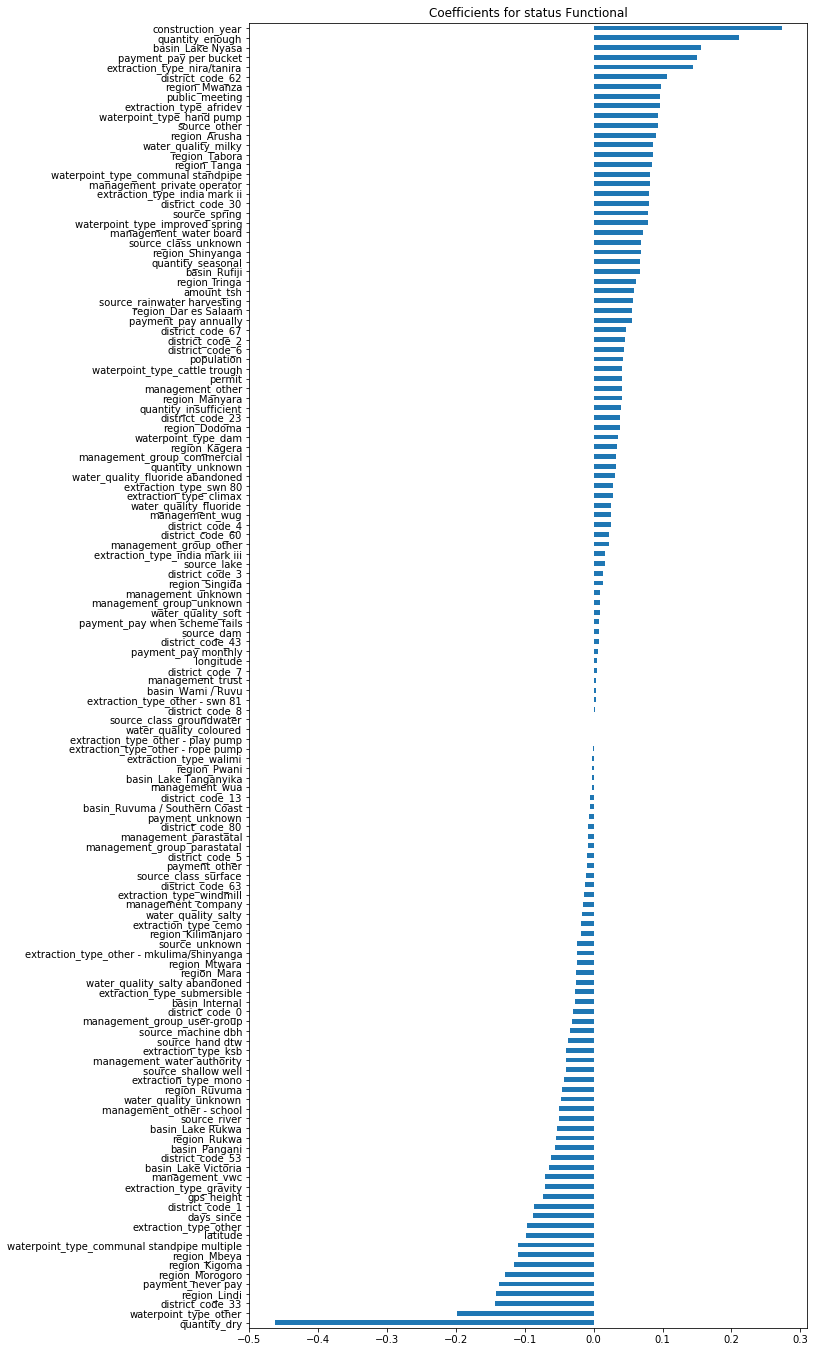

In [180]:
#Model Coefficients plotting for status functional
fig = plt.figure(figsize=(10,24))
model_coefficients['functional'].sort_values().plot(kind='barh');
plt.title("Coefficients for status Functional");

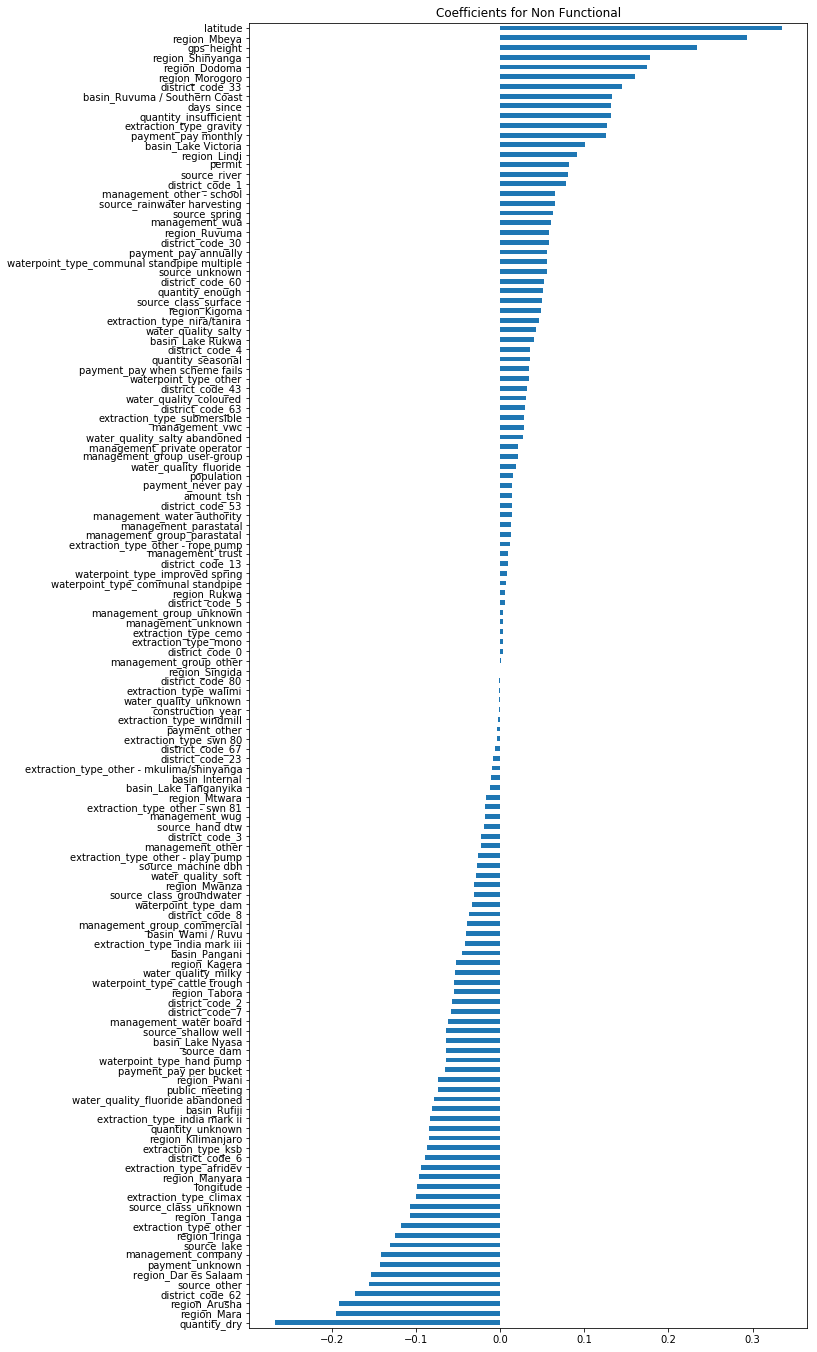

In [182]:
#Model Coefficients plotting for status non functional
fig = plt.figure(figsize=(10,24))
model_coefficients['non functional'].sort_values().plot(kind='barh');
plt.title("Coefficients for Non Functional");

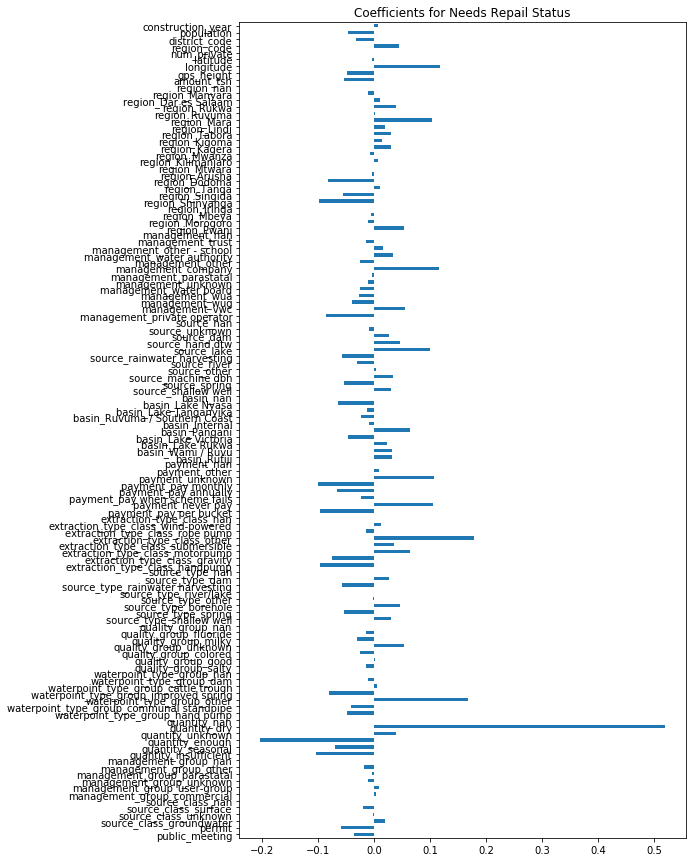

In [0]:
#Model Coefficients plotting for status functional needs repair
fig = plt.figure(figsize=(10,24))
model_coefficients['functional needs repair'].plot(kind='barh');
plt.title("Coefficients for Needs Repail Status");